<a href="https://www.kaggle.com/code/aryansammak/first-project-ds?scriptVersionId=276741597" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-csv/Drug.csv


In [2]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Define the file path
file_path = "/kaggle/input/drug-csv/Drug.csv"

# Step 3: Read the CSV file into a pandas DataFrame
# The read_csv() function is used to read the CSV file and store it as a DataFrame.
# You can specify various options such as delimiter, encoding, and header.
# In this case, we assume that the first row contains column headers.
df = pd.read_csv("/kaggle/input/drug-csv/Drug.csv")
# Step 4: View the first few rows of the DataFrame to get an overview of the data
# The head() function is used to display the top rows of the DataFrame (default is 5 rows).
# You can specify the number of rows to display within the parentheses.
# This helps you get a quick look at the structure of your data.
print(df.head())

# Step 5: Close the file (optional)
# While not necessary, you can close the file explicitly when you're done with it.
# pandas automatically closes the file when the DataFrame goes out of scope.
# But it's good practice to close the file manually if needed.
# df.close()  # Uncomment this line if you want to close the file explicitly

# Step 6: Display basic information about the DataFrame
# You can use the info() function to get information about the DataFrame, including data types and missing values.
print(df.info())

   Age Sex      BP Cholesterol        Na         K   Drug
0   23   F    HIGH        HIGH  0.792535  0.031258  drugY
1   47   M     LOW        HIGH  0.739309  0.056468  drugC
2   47   M     LOW        HIGH  0.697269  0.068944  drugC
3   28   F  NORMAL        HIGH  0.563682  0.072289  drugX
4   61   F     LOW        HIGH  0.559294  0.030998  drugY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB
None


In [3]:
# Step 7: Descriptive statistics for quantitative features
# Describe basic statistics for the quantitative features (Age, Na, K).
# The describe() function provides statistics like count, mean, std (standard deviation), min, 25%, 50%, and max.
quantitative_stats = df[['Age', 'Na', 'K']].describe()

# Step 8: Frequency table for qualitative features
# For qualitative features (Sex, BP, Cholesterol, Drug), we'll create frequency tables.
# The value_counts() function counts the occurrences of each unique value in a column.
# Let's create frequency tables for each qualitative feature.

# Frequency table for Sex
sex_counts = df['Sex'].value_counts()

# Frequency table for BP (Blood Pressure)
bp_counts = df['BP'].value_counts()

# Frequency table for Cholesterol
cholesterol_counts = df['Cholesterol'].value_counts()

# Frequency table for Drug (target variable)
drug_counts = df['Drug'].value_counts()

# Display the statistical summary for quantitative features
print("Statistical Summary for Quantitative Features:")
print(quantitative_stats)

# Display the frequency tables for qualitative features
print("\nFrequency Table for Sex:")
print(sex_counts)

print("\nFrequency Table for Blood Pressure:")
print(bp_counts)

print("\nFrequency Table for Cholesterol:")
print(cholesterol_counts)

print("\nFrequency Table for Drug (Target Variable):")
print(drug_counts)

Statistical Summary for Quantitative Features:
              Age          Na           K
count  200.000000  200.000000  200.000000
mean    44.315000    0.697095    0.050174
std     16.544315    0.118907    0.017611
min     15.000000    0.500169    0.020022
25%     31.000000    0.583887    0.035054
50%     45.000000    0.721853    0.049663
75%     58.000000    0.801494    0.066000
max     74.000000    0.896056    0.079788

Frequency Table for Sex:
Sex
M    104
F     96
Name: count, dtype: int64

Frequency Table for Blood Pressure:
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

Frequency Table for Cholesterol:
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

Frequency Table for Drug (Target Variable):
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [4]:
# Calculate the percentage for each category in the frequency tables
# You can use the division operator to calculate the percentage.
# (count of category / total count) * 100

# Calculate percentage for Sex
sex_percentage = (sex_counts / len(df)) * 100

# Calculate percentage for BP (Blood Pressure)
bp_percentage = (bp_counts / len(df)) * 100

# Calculate percentage for Cholesterol
cholesterol_percentage = (cholesterol_counts / len(df)) * 100

# Calculate percentage for Drug (Target Variable)
drug_percentage = (drug_counts / len(df)) * 100

# Create new DataFrames to display both count and percentage
# Using pd.concat() to concatenate count and percentage along the columns (axis=1).
# Using axis=1 ensures they are displayed side by side.
sex_summary = pd.concat([sex_counts, sex_percentage], axis=1)
sex_summary.columns = ['Count', 'Percentage']

bp_summary = pd.concat([bp_counts, bp_percentage], axis=1)
bp_summary.columns = ['Count', 'Percentage']

cholesterol_summary = pd.concat([cholesterol_counts, cholesterol_percentage], axis=1)
cholesterol_summary.columns = ['Count', 'Percentage']

drug_summary = pd.concat([drug_counts, drug_percentage], axis=1)
drug_summary.columns = ['Count', 'Percentage']

# Display the updated frequency tables with count and percentage
print("\nFrequency Table for Sex:")
print(sex_summary)

print("\nFrequency Table for Blood Pressure:")
print(bp_summary)

print("\nFrequency Table for Cholesterol:")
print(cholesterol_summary)

print("\nFrequency Table for Drug (Target Variable):")
print(drug_summary)


Frequency Table for Sex:
     Count  Percentage
Sex                   
M      104        52.0
F       96        48.0

Frequency Table for Blood Pressure:
        Count  Percentage
BP                       
HIGH       77        38.5
LOW        64        32.0
NORMAL     59        29.5

Frequency Table for Cholesterol:
             Count  Percentage
Cholesterol                   
HIGH           103        51.5
NORMAL          97        48.5

Frequency Table for Drug (Target Variable):
       Count  Percentage
Drug                    
drugY     91        45.5
drugX     54        27.0
drugA     23        11.5
drugC     16         8.0
drugB     16         8.0


In [5]:
# Calculate the percentage for each category in the frequency tables
# You can use the division operator to calculate the percentage.
# (count of category / total count) * 100

# Calculate percentage for Sex
sex_percentage = (sex_counts / len(df)) * 100

# Calculate percentage for BP (Blood Pressure)
bp_percentage = (bp_counts / len(df)) * 100

# Calculate percentage for Cholesterol
cholesterol_percentage = (cholesterol_counts / len(df)) * 100

# Calculate percentage for Drug (Target Variable)
drug_percentage = (drug_counts / len(df)) * 100

# Create new DataFrames to display both count and percentage
# Using pd.concat() to concatenate count and percentage along the columns (axis=1).
# Using axis=1 ensures they are displayed side by side.
sex_summary = pd.concat([sex_counts, sex_percentage], axis=1)
sex_summary.columns = ['Count', 'Percentage']

bp_summary = pd.concat([bp_counts, bp_percentage], axis=1)
bp_summary.columns = ['Count', 'Percentage']

cholesterol_summary = pd.concat([cholesterol_counts, cholesterol_percentage], axis=1)
cholesterol_summary.columns = ['Count', 'Percentage']

drug_summary = pd.concat([drug_counts, drug_percentage], axis=1)
drug_summary.columns = ['Count', 'Percentage']

# Display the updated frequency tables with count and percentage
print("\nFrequency Table for Sex:")
print(sex_summary)

print("\nFrequency Table for Blood Pressure:")
print(bp_summary)

print("\nFrequency Table for Cholesterol:")
print(cholesterol_summary)

print("\nFrequency Table for Drug (Target Variable):")
print(drug_summary)


Frequency Table for Sex:
     Count  Percentage
Sex                   
M      104        52.0
F       96        48.0

Frequency Table for Blood Pressure:
        Count  Percentage
BP                       
HIGH       77        38.5
LOW        64        32.0
NORMAL     59        29.5

Frequency Table for Cholesterol:
             Count  Percentage
Cholesterol                   
HIGH           103        51.5
NORMAL          97        48.5

Frequency Table for Drug (Target Variable):
       Count  Percentage
Drug                    
drugY     91        45.5
drugX     54        27.0
drugA     23        11.5
drugC     16         8.0
drugB     16         8.0


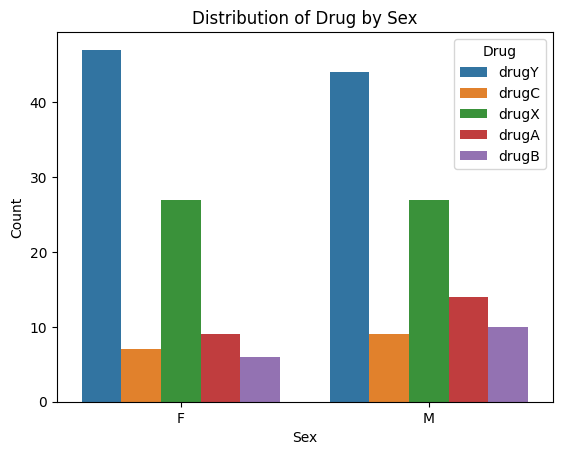

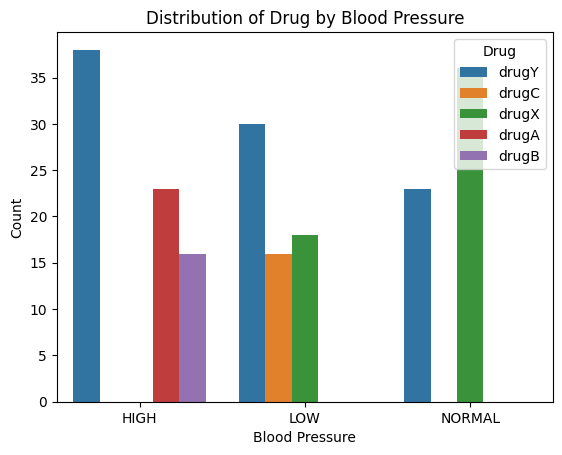

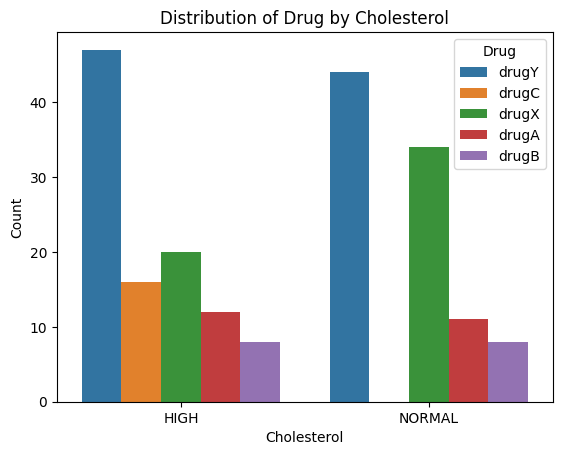

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for Sex vs. Drug
sns.countplot(x='Sex', hue='Drug', data=df)
plt.title('Distribution of Drug by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Bar plot for BP vs. Drug
sns.countplot(x='BP', hue='Drug', data=df)
plt.title('Distribution of Drug by Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

# Bar plot for Cholesterol vs. Drug
sns.countplot(x='Cholesterol', hue='Drug', data=df)
plt.title('Distribution of Drug by Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


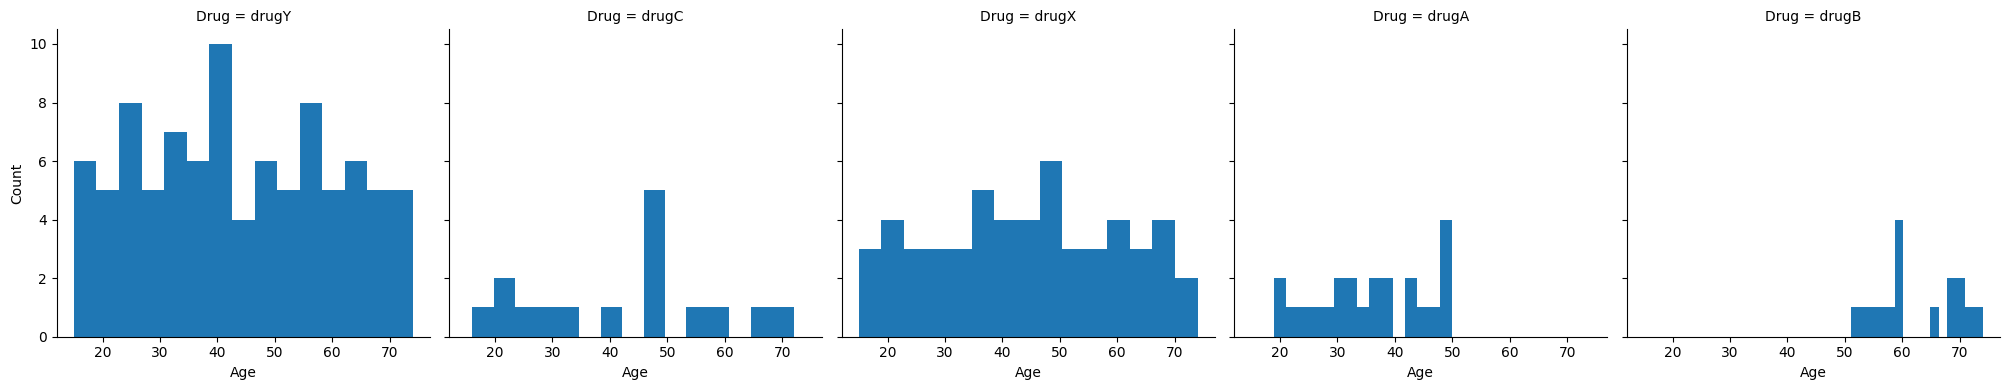

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


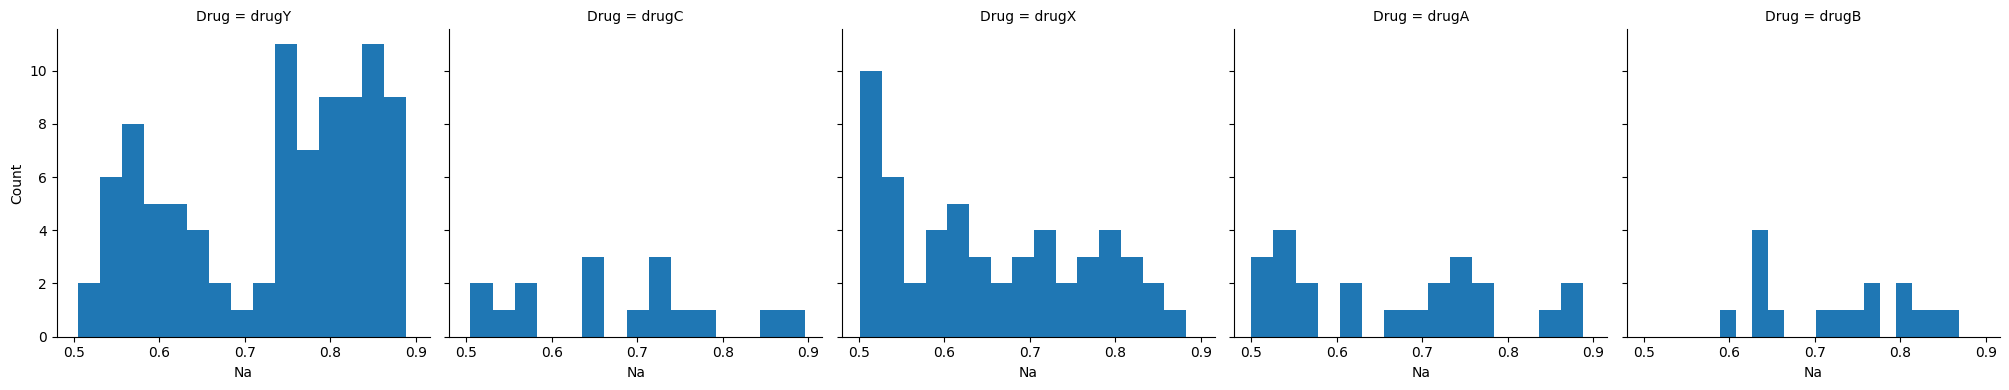

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


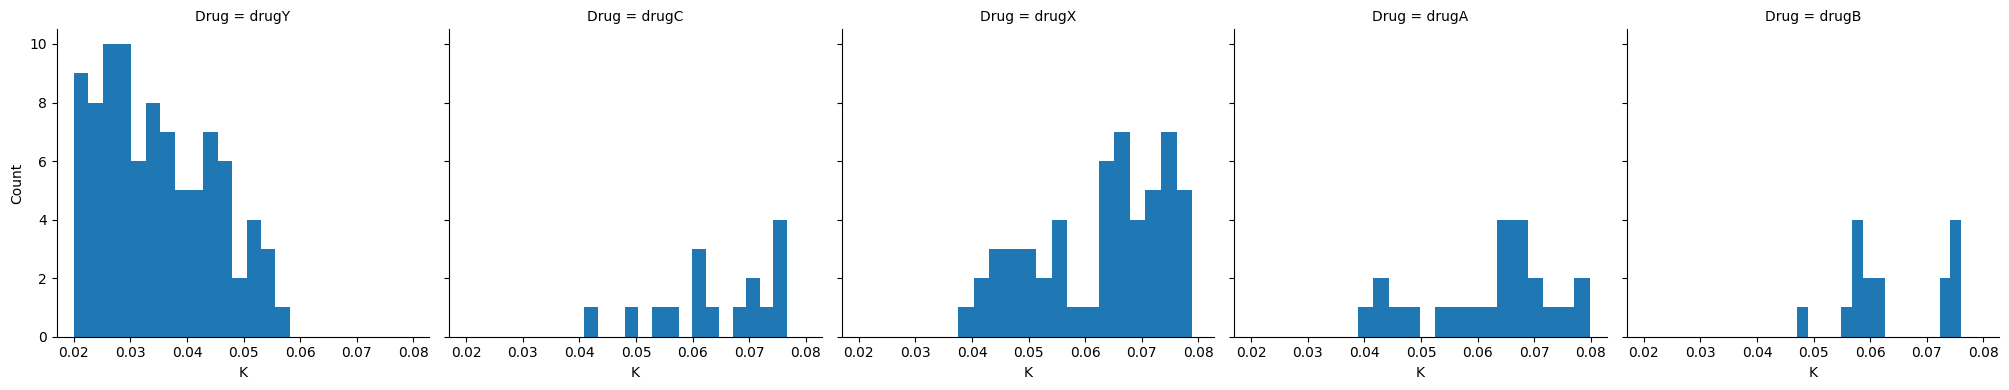

In [7]:
# Histogram for Age vs. Drug
g = sns.FacetGrid(df, col='Drug', height=4)
g.map(plt.hist, 'Age', bins=15)
g.set_axis_labels('Age', 'Count')
g.set_titles('Drug = {col_name}')
plt.show()

# Histogram for Na vs. Drug
g = sns.FacetGrid(df, col='Drug', height=4)
g.map(plt.hist, 'Na', bins=15)
g.set_axis_labels('Na', 'Count')
g.set_titles('Drug = {col_name}')
plt.show()

# Histogram for K vs. Drug
g = sns.FacetGrid(df, col='Drug', height=4)
g.map(plt.hist, 'K', bins=15)
g.set_axis_labels('K', 'Count')
g.set_titles('Drug = {col_name}')
plt.show()

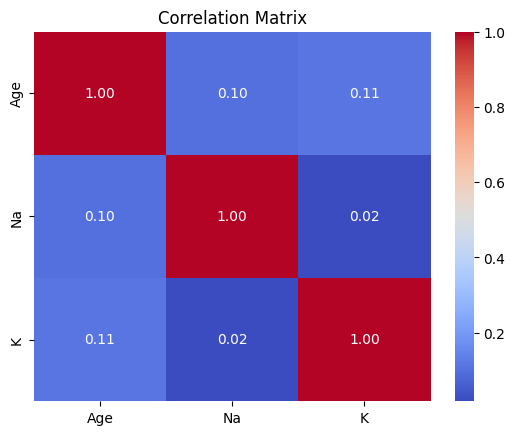

In [8]:
# Calculate the correlation matrix
correlation_matrix = df[['Age', 'Na', 'K']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
import scipy.stats as stats

# List of numerical features
numerical_features = ['Na', 'K', 'Age']

# Perform correlation tests for all combinations of numerical features
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        feature1 = numerical_features[i]
        feature2 = numerical_features[j]
        
        # Calculate Pearson's correlation coefficient and p-value
        pearson_corr, pearson_p_value = stats.pearsonr(df[feature1], df[feature2])
        
        # Calculate Spearman's rank correlation coefficient and p-value
        spearman_corr, spearman_p_value = stats.spearmanr(df[feature1], df[feature2])
        
        print(f"Correlation between {feature1} and {feature2}:")
        print(f"Pearson's correlation coefficient: {pearson_corr:.4f} (p-value: {pearson_p_value:.4f})")
        print(f"Spearman's rank correlation coefficient: {spearman_corr:.4f} (p-value: {spearman_p_value:.4f})")
        print("\n")

Correlation between Na and K:
Pearson's correlation coefficient: 0.0173 (p-value: 0.8075)
Spearman's rank correlation coefficient: -0.0052 (p-value: 0.9417)


Correlation between Na and Age:
Pearson's correlation coefficient: 0.1004 (p-value: 0.1573)
Spearman's rank correlation coefficient: 0.0931 (p-value: 0.1900)


Correlation between K and Age:
Pearson's correlation coefficient: 0.1115 (p-value: 0.1160)
Spearman's rank correlation coefficient: 0.1094 (p-value: 0.1230)




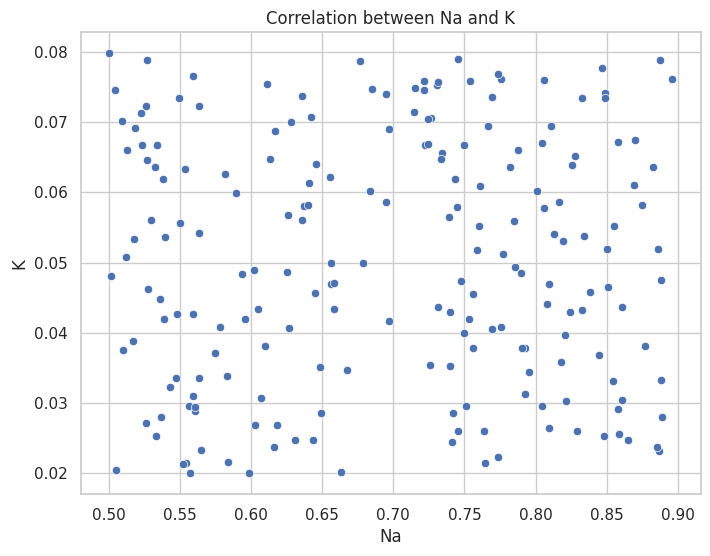

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot between "Na" and "K"
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the correlation between "Na" and "K"
sns.scatterplot(x="Na", y="K", data=df)

plt.title("Correlation between Na and K")
plt.xlabel("Na")
plt.ylabel("K")
plt.show()

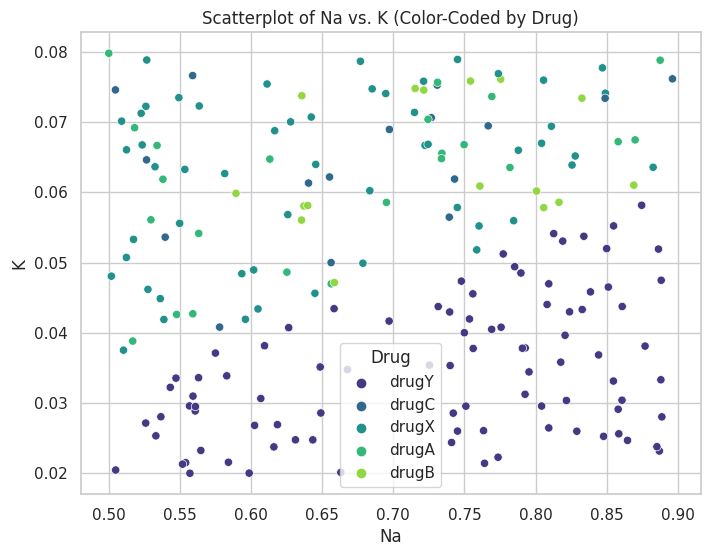

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot of "Na" vs. "K" with color-coded points based on "Drug"
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot "Na" vs. "K" with color-coded points for different "Drug" categories
sns.scatterplot(x="Na", y="K", hue="Drug", data=df, palette="viridis")

plt.title("Scatterplot of Na vs. K (Color-Coded by Drug)")
plt.xlabel("Na")
plt.ylabel("K")
plt.legend(title="Drug")
plt.show()

In [12]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table between "Drug" and "Sex"
contingency_table = pd.crosstab(df['Drug'], df['Sex'])

# Perform the chi-squared test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Squared Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)
print("\nExpected Frequencies:")
print(expected)

Contingency Table:
Sex     F   M
Drug         
drugA   9  14
drugB   6  10
drugC   7   9
drugX  27  27
drugY  47  44

Chi-Squared Statistic: 2.119248418109203
Degrees of Freedom: 4
p-value: 0.7138369773987128

Expected Frequencies:
[[11.04 11.96]
 [ 7.68  8.32]
 [ 7.68  8.32]
 [25.92 28.08]
 [43.68 47.32]]


In [13]:
# Create a new column "Na/K" by dividing "Na" by "K"
df['Na/K'] = df['Na'] / df['K']

# Display the updated DataFrame with the new column
print(df.head())

   Age Sex      BP Cholesterol        Na         K   Drug       Na/K
0   23   F    HIGH        HIGH  0.792535  0.031258  drugY  25.354629
1   47   M     LOW        HIGH  0.739309  0.056468  drugC  13.092530
2   47   M     LOW        HIGH  0.697269  0.068944  drugC  10.113556
3   28   F  NORMAL        HIGH  0.563682  0.072289  drugX   7.797618
4   61   F     LOW        HIGH  0.559294  0.030998  drugY  18.042906


In [14]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Ordinal encoding for Sex
sex_mapping = {'F': 0, 'M': 1}
df['Sex_encoded'] = df['Sex'].map(sex_mapping)

# Ordinal encoding for BP (Blood Pressure)
bp_mapping = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
df['BP_encoded'] = df['BP'].map(bp_mapping)

# Ordinal encoding for Cholesterol
cholesterol_mapping = {'NORMAL': 0, 'HIGH': 1}
df['Cholesterol_encoded'] = df['Cholesterol'].map(cholesterol_mapping)

# Label encoding for Drug
label_encoder = LabelEncoder()
df['Drug_encoded'] = label_encoder.fit_transform(df['Drug'])

# Display the updated DataFrame with encoded columns
print(df.head())

   Age Sex      BP Cholesterol        Na         K   Drug       Na/K  \
0   23   F    HIGH        HIGH  0.792535  0.031258  drugY  25.354629   
1   47   M     LOW        HIGH  0.739309  0.056468  drugC  13.092530   
2   47   M     LOW        HIGH  0.697269  0.068944  drugC  10.113556   
3   28   F  NORMAL        HIGH  0.563682  0.072289  drugX   7.797618   
4   61   F     LOW        HIGH  0.559294  0.030998  drugY  18.042906   

   Sex_encoded  BP_encoded  Cholesterol_encoded  Drug_encoded  
0            0           2                    1             4  
1            1           0                    1             2  
2            1           0                    1             2  
3            0           1                    1             3  
4            0           0                    1             4  


In [15]:
from sklearn.model_selection import train_test_split

# Define your feature columns (X) and target column (y)
X = df[['Age', 'Sex_encoded', 'BP_encoded', 'Cholesterol_encoded', 'Na', 'K', 'Na/K']]
y = df['Drug_encoded']  # Assuming 'Target' is the column name for the target variable

# Split the dataset into training and testing sets with a 50-50 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (100, 7) (100,)
Testing set shape (X, y): (100, 7) (100,)


In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train[['Age', 'Na/K']] = scaler.fit_transform(X_train[['Age', 'Na/K']])
X_test[['Age', 'Na/K']] = scaler.transform(X_test[['Age', 'Na/K']])

# Print the first few rows of the updated training data
print("Updated Training Data:")
print(X_train.head())

Updated Training Data:
          Age  Sex_encoded  BP_encoded  Cholesterol_encoded        Na  \
4    0.921032            0           0                    1  0.559294   
32   0.213453            1           0                    0  0.625889   
142  0.862067            1           2                    0  0.635762   
145  0.921032            1           1                    1  0.745123   
109 -1.319635            1           1                    1  0.543355   

            K      Na/K  
4    0.030998  0.299149  
32   0.056828 -0.762623  
142  0.073744 -1.124022  
145  0.078906 -0.999862  
109  0.032247  0.118925  


Decision Tree Model Rules:
|--- Na/K <= -0.19
|   |--- BP_encoded <= 1.50
|   |   |--- BP_encoded <= 0.50
|   |   |   |--- Cholesterol_encoded <= 0.50
|   |   |   |   |--- class: 3
|   |   |   |--- Cholesterol_encoded >  0.50
|   |   |   |   |--- class: 2
|   |   |--- BP_encoded >  0.50
|   |   |   |--- class: 3
|   |--- BP_encoded >  1.50
|   |   |--- Age <= 0.30
|   |   |   |--- class: 0
|   |   |--- Age >  0.30
|   |   |   |--- class: 1
|--- Na/K >  -0.19
|   |--- class: 4



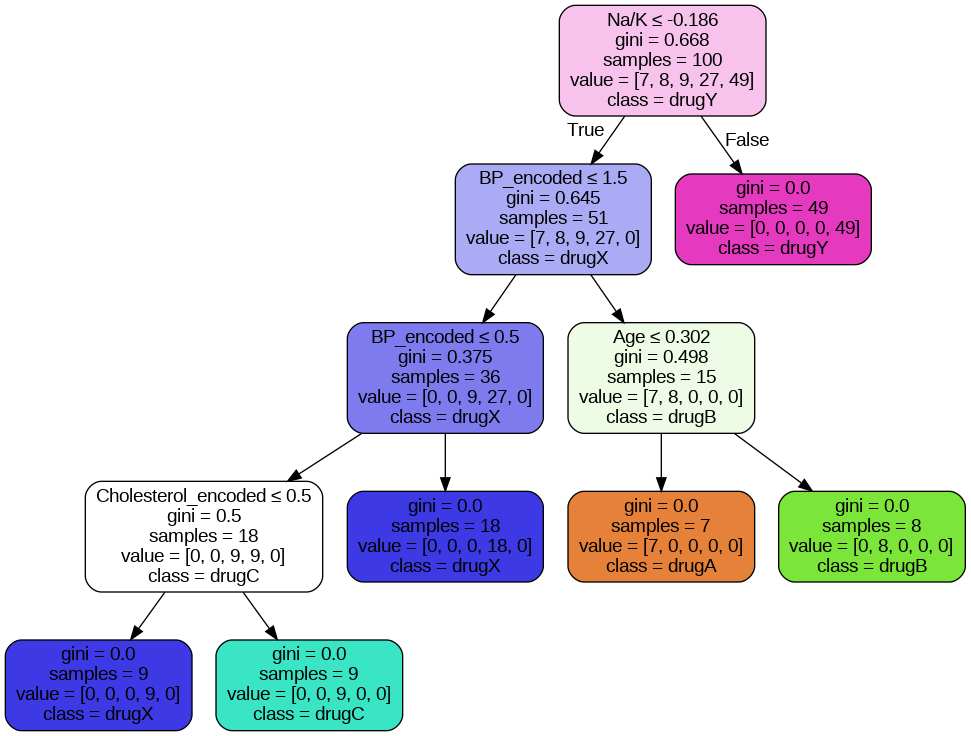

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import graphviz
from sklearn import tree
from IPython.display import Image

# Define the features (excluding 'Sex_encoded', 'Na', and 'K')
features_to_use = ['Age', 'BP_encoded', 'Cholesterol_encoded', 'Na/K']

# Select the relevant columns from the training dataset
X_train_subset = X_train[features_to_use]

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_subset, y_train)

# Display the Decision Tree model as text
tree_rules = export_text(clf, feature_names=features_to_use)
print("Decision Tree Model Rules:")
print(tree_rules)

# Visualize the Decision Tree model
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=features_to_use, 
                                class_names=sorted(df['Drug'].unique()), 
                                filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)# Save the tree visualization as a PDF file
Image(filename="decision_tree.png")      # Open the PDF file (you may need Graphviz installed)


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training and testing datasets
y_train_pred = clf.predict(X_train_subset)
y_test_pred = clf.predict(X_test[features_to_use])

# Evaluate the model on the training dataset
accuracy_train = accuracy_score(y_train, y_train_pred)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
classification_report_train = classification_report(y_train, y_train_pred, target_names=df['Drug'].unique())

# Evaluate the model on the testing dataset
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred, target_names=df['Drug'].unique())

# Print evaluation metrics for training dataset
print("Evaluation Metrics for Training Dataset:")
print(f"Accuracy: {accuracy_train:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_train)
print("Classification Report:")
print(classification_report_train)

# Print evaluation metrics for testing dataset
print("\nEvaluation Metrics for Testing Dataset:")
print(f"Accuracy: {accuracy_test:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_test)
print("Classification Report:")
print(classification_report_test)

Evaluation Metrics for Training Dataset:
Accuracy: 1.00
Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 49]]
Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      1.00      1.00         7
       drugC       1.00      1.00      1.00         8
       drugX       1.00      1.00      1.00         9
       drugA       1.00      1.00      1.00        27
       drugB       1.00      1.00      1.00        49

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Evaluation Metrics for Testing Dataset:
Accuracy: 1.00
Confusion Matrix:
[[16  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 42]]
Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      1.00      1.00        16
       drugC       1.00   

In [19]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression classifier
logistic_reg = LogisticRegression(random_state=42, max_iter=1000)
logistic_reg.fit(X_train_subset, y_train)

# Make predictions on the training and testing datasets
y_train_pred_lr = logistic_reg.predict(X_train_subset)
y_test_pred_lr = logistic_reg.predict(X_test[features_to_use])

# Evaluate the Logistic Regression model on the training dataset
accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
confusion_matrix_train_lr = confusion_matrix(y_train, y_train_pred_lr)
classification_report_train_lr = classification_report(y_train, y_train_pred_lr, target_names=df['Drug'].unique())

# Evaluate the Logistic Regression model on the testing dataset
accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)
confusion_matrix_test_lr = confusion_matrix(y_test, y_test_pred_lr)
classification_report_test_lr = classification_report(y_test, y_test_pred_lr, target_names=df['Drug'].unique())

# Print evaluation metrics for Logistic Regression on training dataset
print("Evaluation Metrics for Logistic Regression on Training Dataset:")
print(f"Accuracy: {accuracy_train_lr:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_train_lr)
print("Classification Report:")
print(classification_report_train_lr)

# Print evaluation metrics for Logistic Regression on testing dataset
print("\nEvaluation Metrics for Logistic Regression on Testing Dataset:")
print(f"Accuracy: {accuracy_test_lr:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_test_lr)
print("Classification Report:")
print(classification_report_test_lr)

Evaluation Metrics for Logistic Regression on Training Dataset:
Accuracy: 0.94
Confusion Matrix:
[[ 6  0  0  0  1]
 [ 0  8  0  0  0]
 [ 0  0  8  1  0]
 [ 0  0  0 23  4]
 [ 0  0  0  0 49]]
Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      0.86      0.92         7
       drugC       1.00      1.00      1.00         8
       drugX       1.00      0.89      0.94         9
       drugA       0.96      0.85      0.90        27
       drugB       0.91      1.00      0.95        49

    accuracy                           0.94       100
   macro avg       0.97      0.92      0.94       100
weighted avg       0.94      0.94      0.94       100


Evaluation Metrics for Logistic Regression on Testing Dataset:
Accuracy: 0.98
Confusion Matrix:
[[16  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0 26  1]
 [ 0  1  0  0 41]]
Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      1.00 

In [20]:
# Access the coefficients (weights) of the Logistic Regression model
coefficients = logistic_reg.coef_

# Access the intercept of the Logistic Regression model
intercept = logistic_reg.intercept_

# Display the coefficients and intercept
print("Logistic Regression Coefficients:")
for feature, coef in zip(features_to_use, coefficients[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {intercept[0]:.4f}")

Logistic Regression Coefficients:
Age: -0.5577
BP_encoded: 1.7187
Cholesterol_encoded: -0.1914
Na/K: -0.9667
Intercept: -2.7108
